In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# load dataset
df = pd.read_csv(r'C:\Users\kmawa\OneDrive\Desktop\First_Project\Project_1\sales_data.csv')
print(df.to_string())

    Transaction_ID        Date Customer_ID     Product     Category  Quantity  Price  Total_Amount Payment_Method Region
0             1001  2024-01-05        C001      Laptop  Electronics         1    800           NaN    Credit Card  North
1             1002  2024-01-10        C002  Smartphone  Electronics         2    600        1200.0           Cash  South
2             1003  2024-01-12        C003  Headphones  Electronics         1    100         100.0         PayPal   West
3             1004  2024-02-05        C004      Tablet  Electronics         1    500         500.0     Debit Card   East
4             1005  2024-02-08        C005        Book        Books         3     20          60.0    Credit Card  North
5             1006  2024-02-10        C001      Laptop  Electronics         1    800         800.0    Credit Card  North
6             1007  2024-03-15        C006       Shoes     Clothing         2     50         100.0           Cash  South
7             1008  2024-03-18  

In [3]:
# clean the dataset - Your first task is to inspect the data, remove duplicates,handle missing values, and standardize formats.
df = df.drop_duplicates()

df['Total_Amount'] = df['Price'] * df['Quantity']

#converting to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

#extracting year,month,date
df['Year'] = df['Date'].dt.year        
df['Month'] = df['Date'].dt.month      
df['Day'] = df['Date'].dt.day 

pd.set_option('display.width', 200)
pd.set_option('display.max_columns', None)
print(df.to_string())
print(df.isna().sum())


    Transaction_ID       Date Customer_ID     Product     Category  Quantity  Price  Total_Amount Payment_Method Region  Year  Month  Day
0             1001 2024-01-05        C001      Laptop  Electronics         1    800           800    Credit Card  North  2024      1    5
1             1002 2024-01-10        C002  Smartphone  Electronics         2    600          1200           Cash  South  2024      1   10
2             1003 2024-01-12        C003  Headphones  Electronics         1    100           100         PayPal   West  2024      1   12
3             1004 2024-02-05        C004      Tablet  Electronics         1    500           500     Debit Card   East  2024      2    5
4             1005 2024-02-08        C005        Book        Books         3     20            60    Credit Card  North  2024      2    8
5             1006 2024-02-10        C001      Laptop  Electronics         1    800           800    Credit Card  North  2024      2   10
6             1007 2024-03-15     

        Quantity       Price  Total_Amount
count  20.000000   20.000000     20.000000
mean    1.550000  325.500000    396.500000
std     0.887041  302.484884    390.418466
min     1.000000   20.000000     25.000000
25%     1.000000   43.750000     78.750000
50%     1.000000  200.000000    200.000000
75%     2.000000  600.000000    650.000000
max     4.000000  800.000000   1200.000000


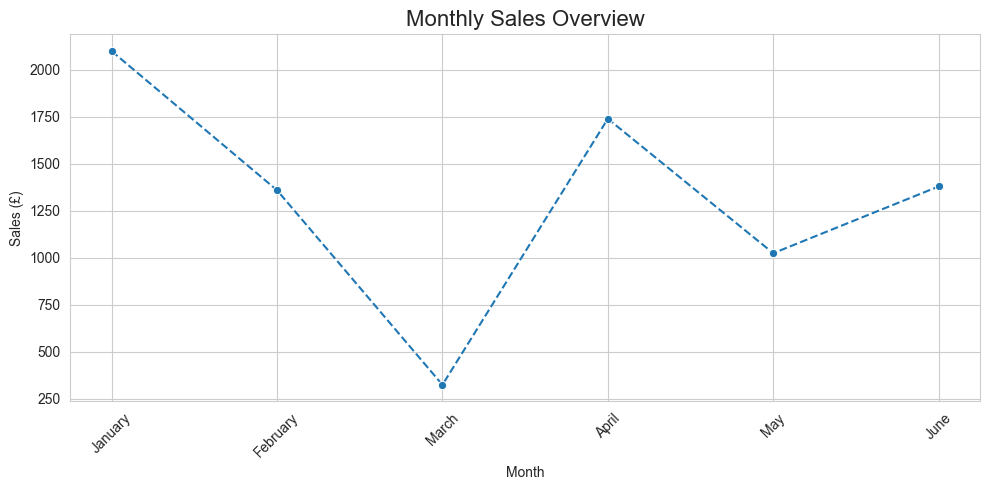

In [4]:
# Summery statistics for columns
print(df[['Quantity' , 'Price' , 'Total_Amount']].describe())

#Monthly Sales Overview

# 1.set theme
sns.set_style('whitegrid')

# 2.group+reindex
df['MonthName'] = df['Date'].dt.strftime('%B')
monthlySales = df.groupby('MonthName')['Total_Amount'].sum()
order_month = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthlySales = monthlySales.reindex(order_month).dropna()

# 3.figure_size + sns.barplot
plt.figure(figsize=(10,5))
sns.lineplot(x=monthlySales.index, y=monthlySales.values, linestyle='dashed', marker='o')

#label + xticks+show
plt.title('Monthly Sales Overview', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Sales (£)')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()


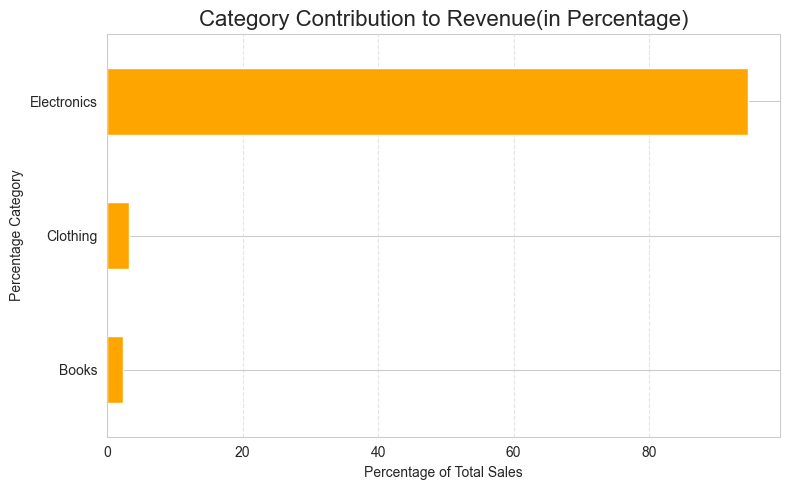

In [5]:
#Category Contribution to Revenue

# convert raw sales values into percentage of total to show contribution to revenue
categorySales = df.groupby('Category')['Total_Amount'].sum()
percentageOfCategory = categorySales / categorySales.sum() * 100
percentageOfCategory = percentageOfCategory.sort_values(ascending=True)

# plot the chart horizontally
plt.figure(figsize=(8,5))
percentageOfCategory.plot(kind='barh', color='orange')
plt.title('Category Contribution to Revenue(in Percentage)', fontsize=16)
plt.xlabel('Percentage of Total Sales')
plt.ylabel('Percentage Category')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

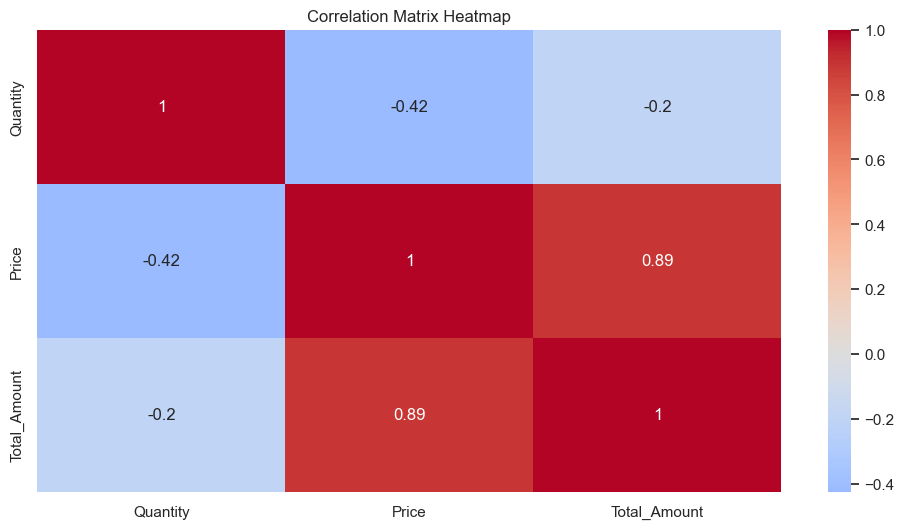

In [137]:
numeric_df = df[['Quantity', 'Price', 'Total_Amount']]
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',center=0)
plt.title("Correlation Matrix Heatmap")
plt.show()


In [6]:
# top-selling months
nameOfMonths = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
    }
toptSellingMonths = df.groupby('Month')['Total_Amount'].sum().sort_values(ascending=False).head(3)
toptSellingMonths.index = toptSellingMonths.index.map(nameOfMonths)
print('Top Selling Months:', toptSellingMonths)

#top selling products
topSellingProducts = df['Product'].value_counts().head(5)
print('\n Top Selling Products:', topSellingProducts)
#top_revenue_customers
topRevenueCustomers = df.groupby('Customer_ID')['Total_Amount'].sum().sort_values(ascending=False).head(5)
print('\n Top Revenue Customers:', topRevenueCustomers)

Top Selling Months: Month
January    2100
April      1740
June       1380
Name: Total_Amount, dtype: int64

 Top Selling Products: Product
Laptop        3
Smartphone    3
Tablet        3
Book          3
Headphones    2
Name: count, dtype: int64

 Top Revenue Customers: Customer_ID
C002    2400
C001    1600
C013     800
C017     600
C004     500
Name: Total_Amount, dtype: int64


In [7]:
df['Customer_ID'] = df['Customer_ID'].apply(lambda x: f'CUST-{str(hash(x))[:4]}')
print('\n Anonymization has been applied to Customer_ID in accordance with GDPR')


 Anonymization has been applied to Customer_ID in accordance with GDPR


In [8]:
recommendations = [
    "Focus on busy sale months as sales were highest in May, April, and June. Plan promotions during these times.",
    "Most selling products such as Laptops and Smartphones given higher contribution in revenue so prioritize them in marketing and inventory.",
    "Think about the early access of deals to regular customers.",
    "Price has a stronger impact on revenue than quantity. Focus on value-based pricing strategies.",
    "Electronics are the most profitable category. Reevaluate lower-performing segments like Books or Clothing.",
    "Customer IDs have been anonymized to protect privacy in line with GDPR standards."
]

# Print each recommendation
print("\n Actionable Recommendations:\n")
for rec in recommendations:
    print("- " + rec)



 Actionable Recommendations:

- Focus on busy sale months as sales were highest in May, April, and June. Plan promotions during these times.
- Most selling products such as Laptops and Smartphones given higher contribution in revenue so prioritize them in marketing and inventory.
- Think about the early access of deals to regular customers.
- Price has a stronger impact on revenue than quantity. Focus on value-based pricing strategies.
- Electronics are the most profitable category. Reevaluate lower-performing segments like Books or Clothing.
- Customer IDs have been anonymized to protect privacy in line with GDPR standards.
